# Visualizing Euro Exchange Rate Data
- The goal of this project is to clean and **provide visualization** for daily exchange rate data.
- The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. It can be found on [Kaggle](https://kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

exchange_rates = pd.read_csv("euro-daily-hist_1999_2024.csv")

### Dataset overview

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

A total of 40 exchange rates were tracked. Most of the columns have missing values (NaN values) and are of the 'object' type. Rows store data from the newest to the oldest.

### Data Cleaning

Our focus will be on the exchange rate between the euro and the American dollar. We will begin by converting the relevent columns into snake_case and re-sorting the data from oldest to newest.

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

Now let's select only the needed data and check for abnormalities.

In [5]:
euro_to_dollar = exchange_rates[["Time", "US_dollar"]]
print(euro_to_dollar["US_dollar"].value_counts())

US_dollar
-         62
1.2276     9
1.0808     8
1.1215     8
1.0867     8
          ..
1.4579     1
1.4607     1
1.4639     1
1.4651     1
1.086      1
Name: count, Length: 3785, dtype: int64


There are 62 rows without information with the character '-' which should be removed.

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"] != "-"]

euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype("float")
print(euro_to_dollar["US_dollar"].describe())

count    6473.000000
mean        1.187262
std         0.156512
min         0.825200
25%         1.086700
50%         1.178700
75%         1.305500
max         1.599000
Name: US_dollar, dtype: float64


### Data Visualization

In order to see the euro-dollar exchange rate change over time, let's plot the moving average.

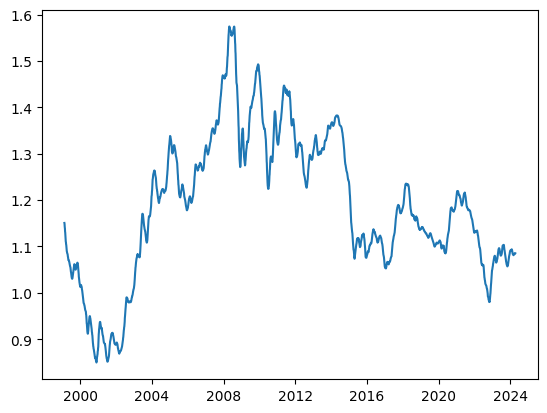

In [7]:
euro_to_dollar["moving_avg"] = euro_to_dollar["US_dollar"].rolling(30).mean()

plt.plot(euro_to_dollar["Time"], euro_to_dollar["moving_avg"])
plt.show()

We want show how the euro-dollar exchange rate has changed during the coronavirus pandemic. We can show the 2020-2022 data, the 2018-2019 data as a baseline and post-pandemic data of 2023-2024. We can use the moving average line plot.

In [8]:
total_rate = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2017) & (euro_to_dollar['Time'].dt.year <= 2024)]
pre_rate = total_rate[(total_rate['Time'].dt.year >= 2017) & (total_rate['Time'].dt.year <= 2019)]
covid_rate = total_rate[(total_rate['Time'].dt.year >= 2020) & (total_rate['Time'].dt.year <= 2022)]
post_rate = total_rate[total_rate['Time'].dt.year == 2023]

To better separate the three different time periods, we can split the line chart into four parts with the fourth part being the all three periods combined.

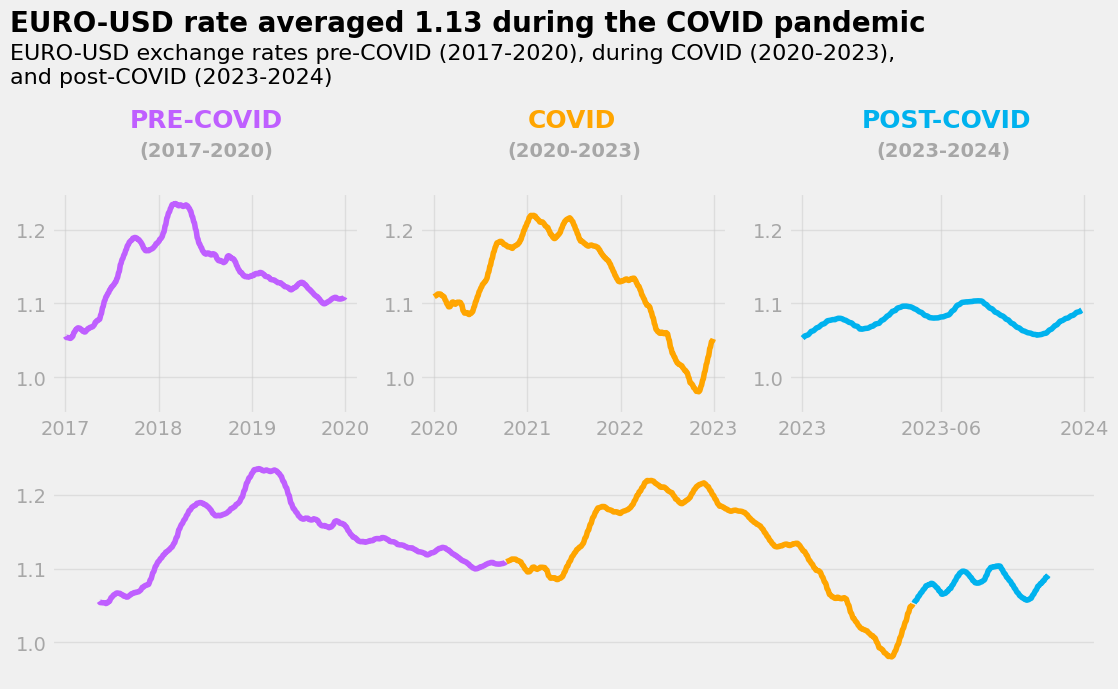

In [9]:
covid_rate_avg = round(covid_rate["US_dollar"].mean(), 2)

### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

## Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.95, 1.25)
    ax.set_yticks([1.0, 1.1, 1.2])
    ax.set_yticklabels(['1.0', '1.1','1.2'],
                  alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: pre_rate
ax1.plot(pre_rate['Time'], pre_rate['moving_avg'],
        color='#BF5FFF')
ax1.set_xticks(ticks=[pd.to_datetime("2017"), pd.to_datetime("2018"),  pd.to_datetime("2019"), pd.to_datetime("2020")])
ax1.set_xticklabels(["2017", "2018", "2019", "2020"],
                   alpha=0.3)
ax1.text(17420.0, 1.34, 'PRE-COVID', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(17455.0, 1.3, '(2017-2020)', weight='bold',
        alpha=0.3)


### Ax2: covid_rate
ax2.plot(covid_rate['Time'], covid_rate['moving_avg'],
        color='#ffa500')
ax2.set_xticks(ticks=[pd.to_datetime("2020"), pd.to_datetime("2021"), pd.to_datetime("2022"), pd.to_datetime("2023")])
ax2.set_xticklabels(["2020", "2021", "2022", "2023"],
                   alpha=0.3)
ax2.text(18630.0, 1.34, 'COVID', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(18550.0, 1.3, '(2020-2023)', weight='bold',
         alpha=0.3)


### Ax3: post_rate
ax3.plot(post_rate['Time'], post_rate['moving_avg'],
        color='#00B2EE')
ax3.set_xticks(ticks=[pd.to_datetime("2023"), pd.to_datetime("2023-06-30"), pd.to_datetime("2024")])
ax3.set_xticklabels(["2023", "2023-06", "2024"],
                   alpha=0.3)
ax3.text(19435.0, 1.34, 'POST-COVID', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(19455.0, 1.3, '(2023-2024)', weight='bold',
         alpha=0.3)

### Ax4: pre_rate-covid_rate-post_rate
ax4.plot(pre_rate['Time'], pre_rate['moving_avg'],
        color='#BF5FFF')
ax4.plot(covid_rate['Time'], covid_rate['moving_avg'],
        color='#ffa500')
ax4.plot(post_rate['Time'], post_rate['moving_avg'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

## Adding a title and a subtitle
ax1.text(16950.0, 1.47, f'EURO-USD rate averaged {covid_rate_avg} during the COVID pandemic',
         fontsize=20, weight='bold')
ax1.text(16950.0, 1.40, '''EURO-USD exchange rates pre-COVID (2017-2020), during COVID (2020-2023),
and post-COVID (2023-2024)''',
        fontsize=16)

plt.show()

Since people read graphs from top to bottom, the bold title quickly grabs the audience's attention and achieves the graph's goal - to inform viewers about the EUR-USD exchange rate during COVID. The subtitle is the actual name of the graph. Three different colored line graphs help to distinguish the different time periods. Finally, the graph at the bottom combines the periods to create a complete picture. Since there is no background and only the necessary lines are used, the data-ink ratio is kept relatively high.